Let's generate some data first sampled from the Clayton copula

In [1]:
from scipy.stats import multivariate_normal, norm, poisson, gamma
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
%load_ext autoreload
%autoreload 2
from CopulaGenerator import CopulaGenerator 
import itertools

In [2]:
cop = CopulaGenerator()

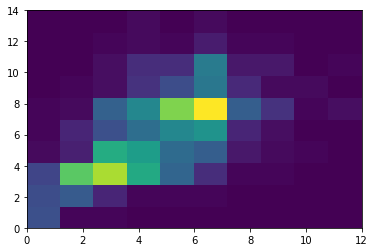

In [3]:
cp = cop.MultiDimensionalClayton(1.5, d=(2,1000))
lambdas = np.random.uniform(0.5, 6, size=2)
data_clayton = cop.generate_data(cp, lambdas)
fig, ax = plt.subplots(1, 1)
ax.hist2d(data_clayton[0], data_clayton[1], bins=10, density=True, cmin=0, cmax=10)
plt.show()
#ax.hist(data_clayton, density=True, histtype='stepfilled', alpha=0.2)


Now we compute the CDF of the multidimensional data.

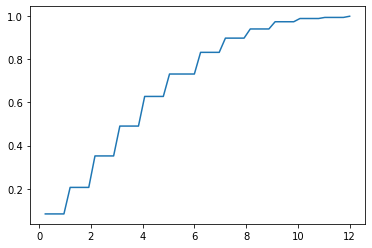

In [8]:
num_bins = 50
counts, bin_edges = np.histogram(data_clayton, bins=num_bins)
cdf = np.cumsum(counts) # formula
plt.plot(bin_edges[1:], cdf/cdf[-1])

In [69]:
poisson_cdf = poisson.cdf(data_clayton[0], 4.1)
poisson_cdf[:40]

array([0.76931223, 0.9988747 , 0.94268792, 0.08452064, 0.60930829,
       0.76931223, 0.97550825, 0.60930829, 0.87864825, 0.60930829,
       0.97550825, 0.60930829, 0.76931223, 0.87864825, 0.22381398,
       0.87864825, 0.41418154, 0.60930829, 0.87864825, 0.87864825,
       0.94268792, 0.22381398, 0.87864825, 0.94268792, 0.97550825,
       0.97550825, 0.41418154, 0.41418154, 0.87864825, 0.99045973,
       0.87864825, 0.76931223, 0.94268792, 0.41418154, 0.99990157,
       0.60930829, 0.60930829, 0.94268792, 0.76931223, 0.22381398])

In [61]:
x = poisson.rvs(lambdas[0], size=1000)
poisson_cdf = poisson.cdf(x, lambdas[0])
poisson_cdf[:20]

array([0.86703376, 0.75252854, 0.39470746, 0.39470746, 0.20974113,
       0.39470746, 0.75252854, 0.75252854, 0.20974113, 0.39470746,
       0.07774051, 0.07774051, 0.20974113, 0.86703376, 0.86703376,
       0.39470746, 0.58909599, 0.07774051, 0.01493929, 0.20974113])

In [53]:
def pmf(x):
    dim = len(x)
    m = list(itertools.combinations_with_replacement([0,1], dim))
    sum_m = np.array([sum(i) for i in m])
    sum_k = np.zeros(dim)
    for k in range(5, dim):
        indices = np.where(sum_m == k)
        print(sum_m)
        correct_ms = np.take(sum_m, indices)
        print(correct_ms)
        sum_fx = np.add(np.subtract(x, )) # sum elements from the element-wise
        # substraction between the original x input array and the values mi such that m sums up to k 
        sum_k = np.add(sum_k, -1**k * sum_fx)
    return sum_k
    

In [32]:
a = list(itertools.combinations_with_replacement([0,1], 2))

value of i: 0
value of i: 1


In [51]:
b = np.array([sum(i) for i in a])
np.where(b == 2)

(array([2]),)

In [54]:
c = np.random.randint(0,10, size=10)

In [55]:
c

array([6, 4, 6, 6, 5, 3, 6, 0, 9, 9])

In [59]:
d = np.random.randint(0, 5, size=10)

In [73]:
pmf(c)

[ 0  1  2  3  4  5  6  7  8  9 10]
[[5]]


ValueError: invalid number of arguments

In [1]:
from MultivariatePoisson import MultivariatePoisson 

In [2]:
mv = MultivariatePoisson()

In [3]:
data = mv.rvs("gaussian")
data.shape

number 0


(1, 2000)